# Automatic program Repair (APR)


In [1]:


import sys
import os
import hashlib
sys.path.append(os.path.abspath(os.path.join('..')))
from utils.simple_metrics import compute_and_store_metrics
from utils.visualization import compare_groundtruth_vs_corrected_histograms, compare_metrics_versus_bug_histograms, plot_column_distribution, plot_metrics_boxplots
from bug_detective.detective import process_prompt_dataset
from data_loader.loader import load_buggy_dataset, load_data, save_data
import numpy as np
import pandas as pd



# Add the data_loader module to the path

# Import data loader functions

# Load sample train data
# print("Loading sample train data...")

# Load buggy train dataset
# buggy_train_df = load_buggy_dataset('train')

In [2]:
df_sys = load_data('df_sys_cleaned.pkl')
df_base = load_data('df_base_cleaned.pkl')
df_prompt = load_data('df_prompt_cleaned.pkl')
# df_cleaned = load_data('300_metrics_prompt_system_apr_cleaned')


In [3]:
# print(df_cleaned.loc[df_cleaned.index[3], 'response_gpt-4o'])

4 - fechada pequena, aberta pequena focada em code


In [6]:
from utils.simple_metrics import aggregate_metrics_summary, print_metrics_summary
df_base_updated = compute_and_store_metrics(df_base,force_recompute=True)
df_prompt_updated = compute_and_store_metrics(df_prompt,force_recompute=True)
df_sys_updated = compute_and_store_metrics(df_sys,force_recompute=True)

# Your DataFrames
dfs = [df_base_updated, df_prompt_updated, df_sys_updated]

# Generate summary
summary_df_updated = aggregate_metrics_summary(
    dataframes=dfs,
    category_column="prompt"
)

# Display summary for AST score
print_metrics_summary(summary_df_updated, metric_name="ast_score")


Computing metrics for after_merge_without_docstrings vs 4 response columns...
Processing response_qwen-2.5-coder-32b-instruct...


Computing response_qwen-2.5-coder-32b-instruct:   4%|▍         | 12/300 [19:13<7:41:31, 96.15s/it] 


KeyboardInterrupt: 

In [7]:
# from data_loader.loader import load_buggy_dataset, load_data, save_data

# # Save the cleaned DataFrames to files for future experiments
# save_data(df_sys, "df_sys_cleaned.pkl")
# save_data(df_base, "df_base_cleaned.pkl")
# save_data(df_prompt, "df_prompt_cleaned.pkl")






In [3]:
from utils.simple_metrics import aggregate_metrics_summary, print_metrics_summary

# Your DataFrames
dfs = [df_base, df_prompt, df_sys]

# Generate summary
summary_df = aggregate_metrics_summary(
    dataframes=dfs,
    category_column="prompt"
)

# Display summary for AST score
print_metrics_summary(summary_df, metric_name="ast_score")



METRICS SUMMARY: AST_SCORE
                      model     category  n_samples  ast_score_mean  ast_score_variance  ast_score_std  ast_score_min  ast_score_max  ast_score_normalized_mean  ast_score_normalized_variance  ast_score_normalized_std  ast_score_normalized_min  ast_score_normalized_max
qwen-2.5-coder-32b-instruct     baseline        300          0.7411              0.0813         0.2851            0.0            1.0                     0.7511                         0.0751                    0.2740                       0.0                       1.0
          claude-3.5-sonnet     baseline        300          0.5960              0.1144         0.3382            0.0            1.0                     0.6147                         0.1135                    0.3369                       0.0                       1.0
             codestral-2501     baseline        300          0.7577              0.0794         0.2817            0.0            1.0                     0.7702      

In [11]:
import numpy as np

def format_all_metrics_mean_std(df):
    """
    For each metric in the DataFrame, format the mean and std columns as 'mean±std' with 2 decimals.
    Returns a new DataFrame with model, category, n_samples, and one column per metric in 'mean±std' format.
    """
    # Identify all metrics by looking for columns ending with '_mean'
    metric_names = [col[:-5] for col in df.columns if col.endswith('_mean')]
    formatted = df[["model", "category"]].copy()
    for metric in metric_names:
        mean_col = f"{metric}_mean"
        std_col = f"{metric}_std"
        if mean_col in df.columns and std_col in df.columns:
            formatted[f"{metric}_mean±std"] = df.apply(
                lambda row: f"{row[mean_col]:.2f}±{row[std_col]:.2f}", axis=1
            )
    return formatted

# Create a new DataFrame with all metrics formatted as 'mean±std'
formatted_metrics_df = format_all_metrics_mean_std(summary_df)
formatted_metrics_df = formatted_metrics_df.sort_values(by="model").reset_index(drop=True)
print("\nFormatted Metrics (mean±std) for all metrics:")
print(formatted_metrics_df.to_string(index=False))



Formatted Metrics (mean±std) for all metrics:
                      model     category ast_score_mean±std text_score_mean±std ast_score_normalized_mean±std codebleu_mean±std ngram_match_score_mean±std weighted_ngram_match_score_mean±std syntax_match_score_mean±std dataflow_match_score_mean±std
          claude-3.5-sonnet     baseline          0.60±0.34           0.72±0.23                     0.61±0.34         0.73±0.17                  0.64±0.27                           0.71±0.24                   0.76±0.19                     0.71±0.26
          claude-3.5-sonnet prompt_style          0.61±0.34           0.72±0.23                     0.62±0.33         0.73±0.17                  0.64±0.26                           0.72±0.24                   0.77±0.19                     0.71±0.26
          claude-3.5-sonnet       system          0.55±0.37           0.72±0.22                     0.57±0.37         0.73±0.17                  0.65±0.26                           0.71±0.24                

Creating boxplots using stored metrics for 4 response columns...


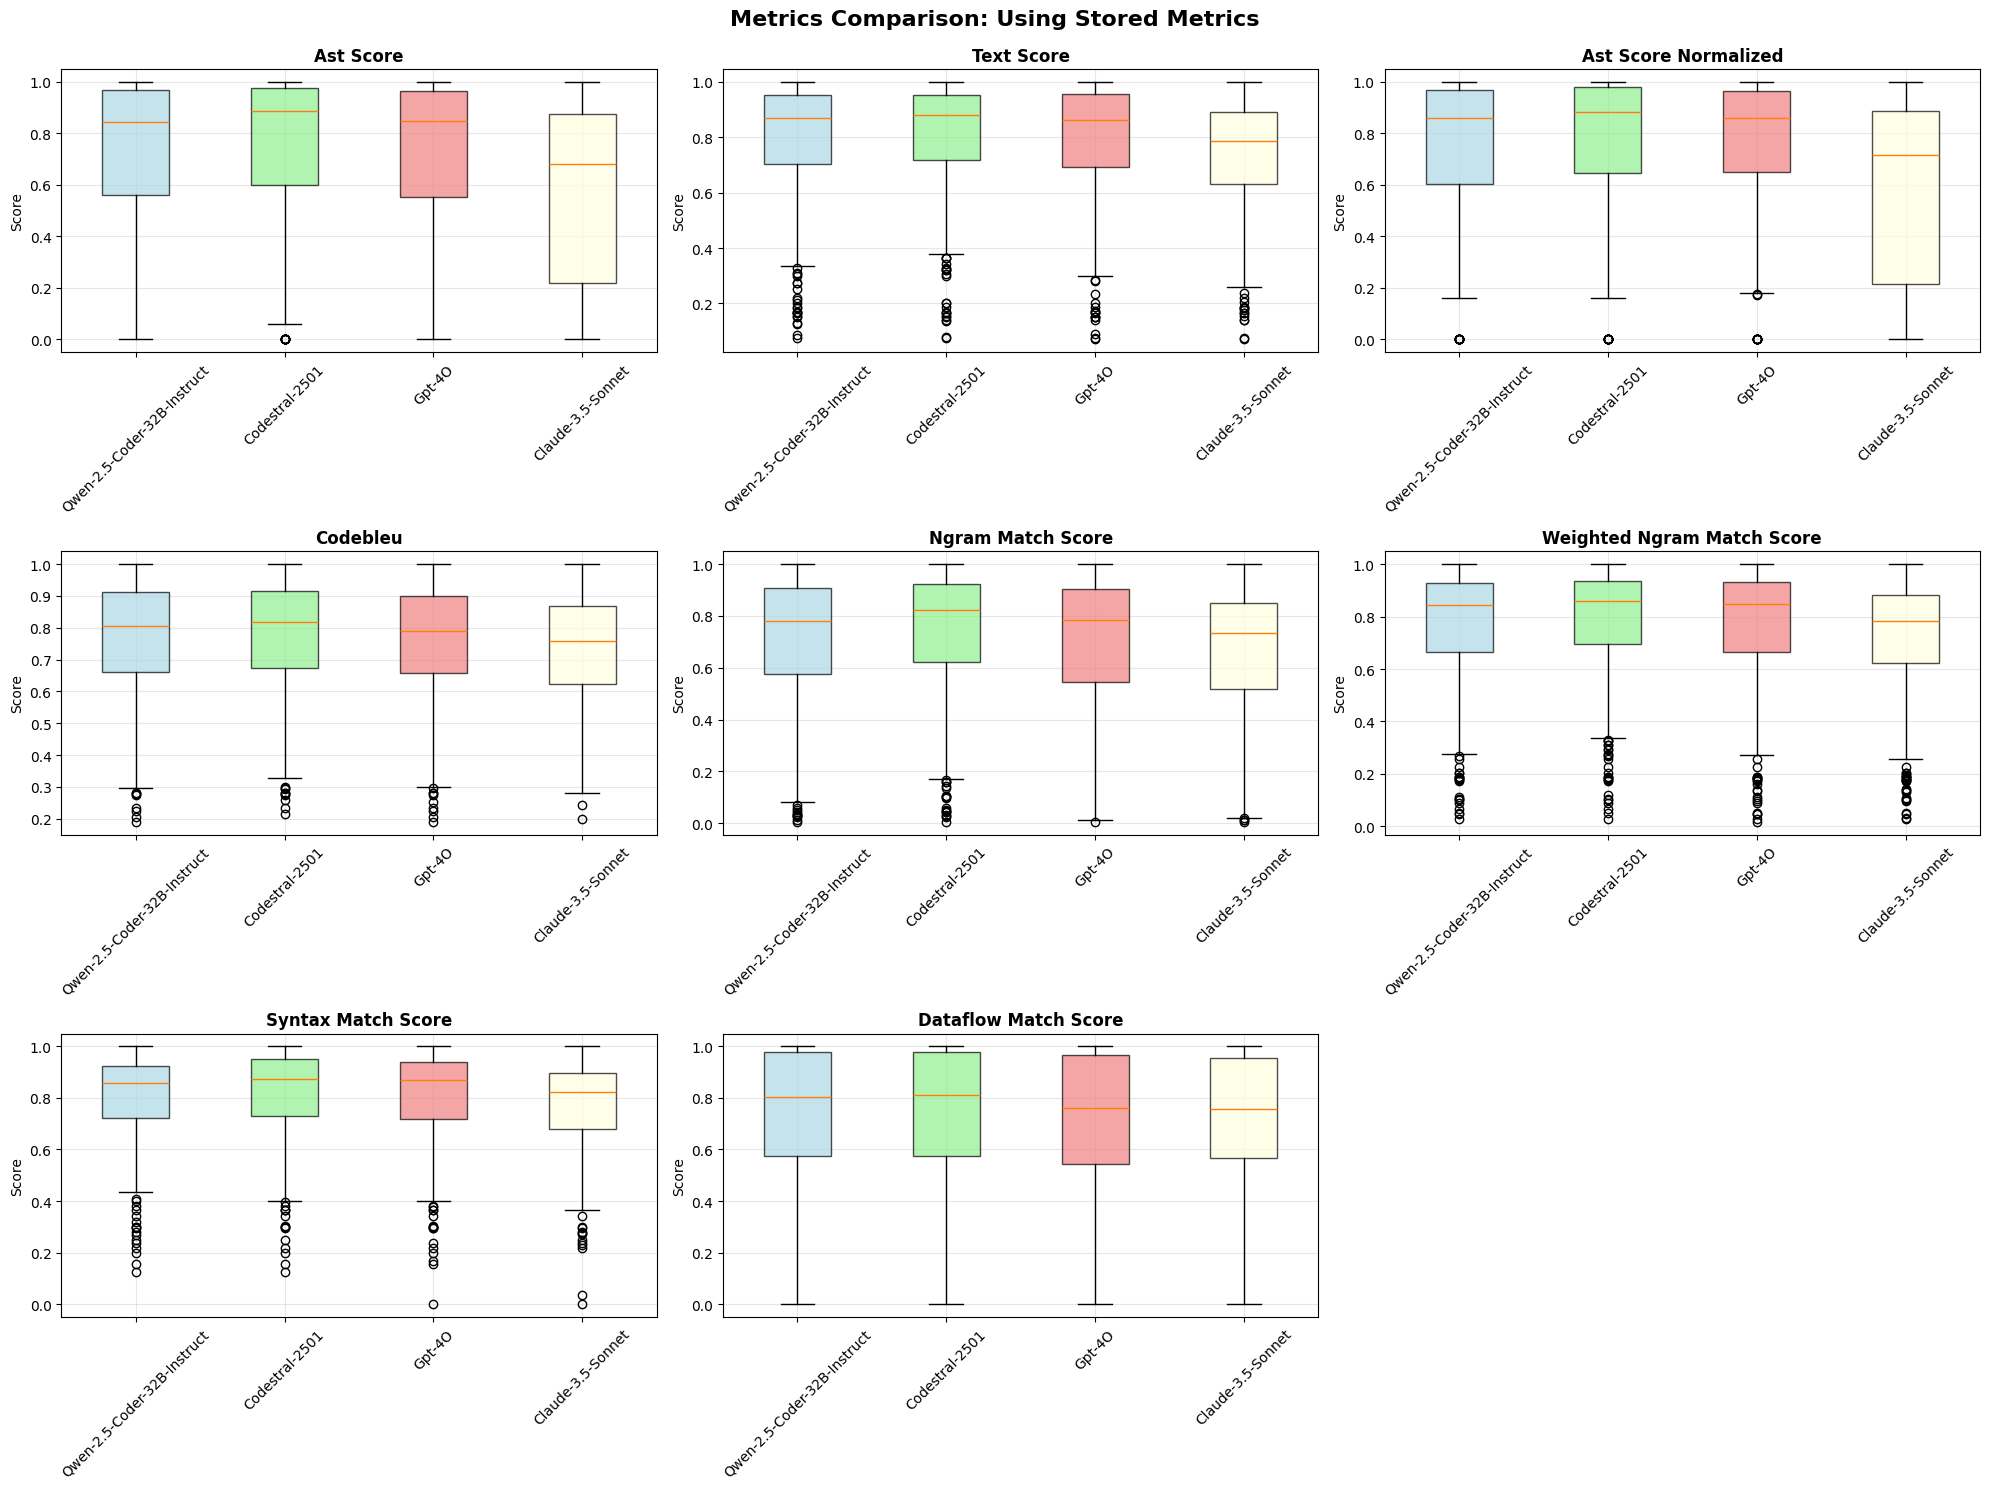


=== SUMMARY STATISTICS (FROM STORED METRICS) ===
Number of response columns: 4
Number of metrics: 8
Available metrics: ['ast_score', 'text_score', 'ast_score_normalized', 'codebleu', 'ngram_match_score', 'weighted_ngram_match_score', 'syntax_match_score', 'dataflow_match_score']

Ast Score:
  Qwen-2.5-Coder-32B-Instruct: mean=0.734, std=0.289, median=0.843 (n=300)
  Codestral-2501: mean=0.755, std=0.285, median=0.887 (n=300)
  Gpt-4O: mean=0.737, std=0.286, median=0.847 (n=300)
  Claude-3.5-Sonnet: mean=0.550, std=0.367, median=0.679 (n=300)

Text Score:
  Qwen-2.5-Coder-32B-Instruct: mean=0.785, std=0.227, median=0.868 (n=300)
  Codestral-2501: mean=0.797, std=0.216, median=0.882 (n=300)
  Gpt-4O: mean=0.782, std=0.231, median=0.862 (n=300)
  Claude-3.5-Sonnet: mean=0.724, std=0.216, median=0.787 (n=300)

Ast Score Normalized:
  Qwen-2.5-Coder-32B-Instruct: mean=0.745, std=0.281, median=0.859 (n=300)
  Codestral-2501: mean=0.769, std=0.273, median=0.882 (n=300)
  Gpt-4O: mean=0.761, 

In [12]:

plot_metrics_boxplots(
    df_sys, reference_column="after_merge_without_docstrings")

Creating boxplots using stored metrics for 4 response columns...


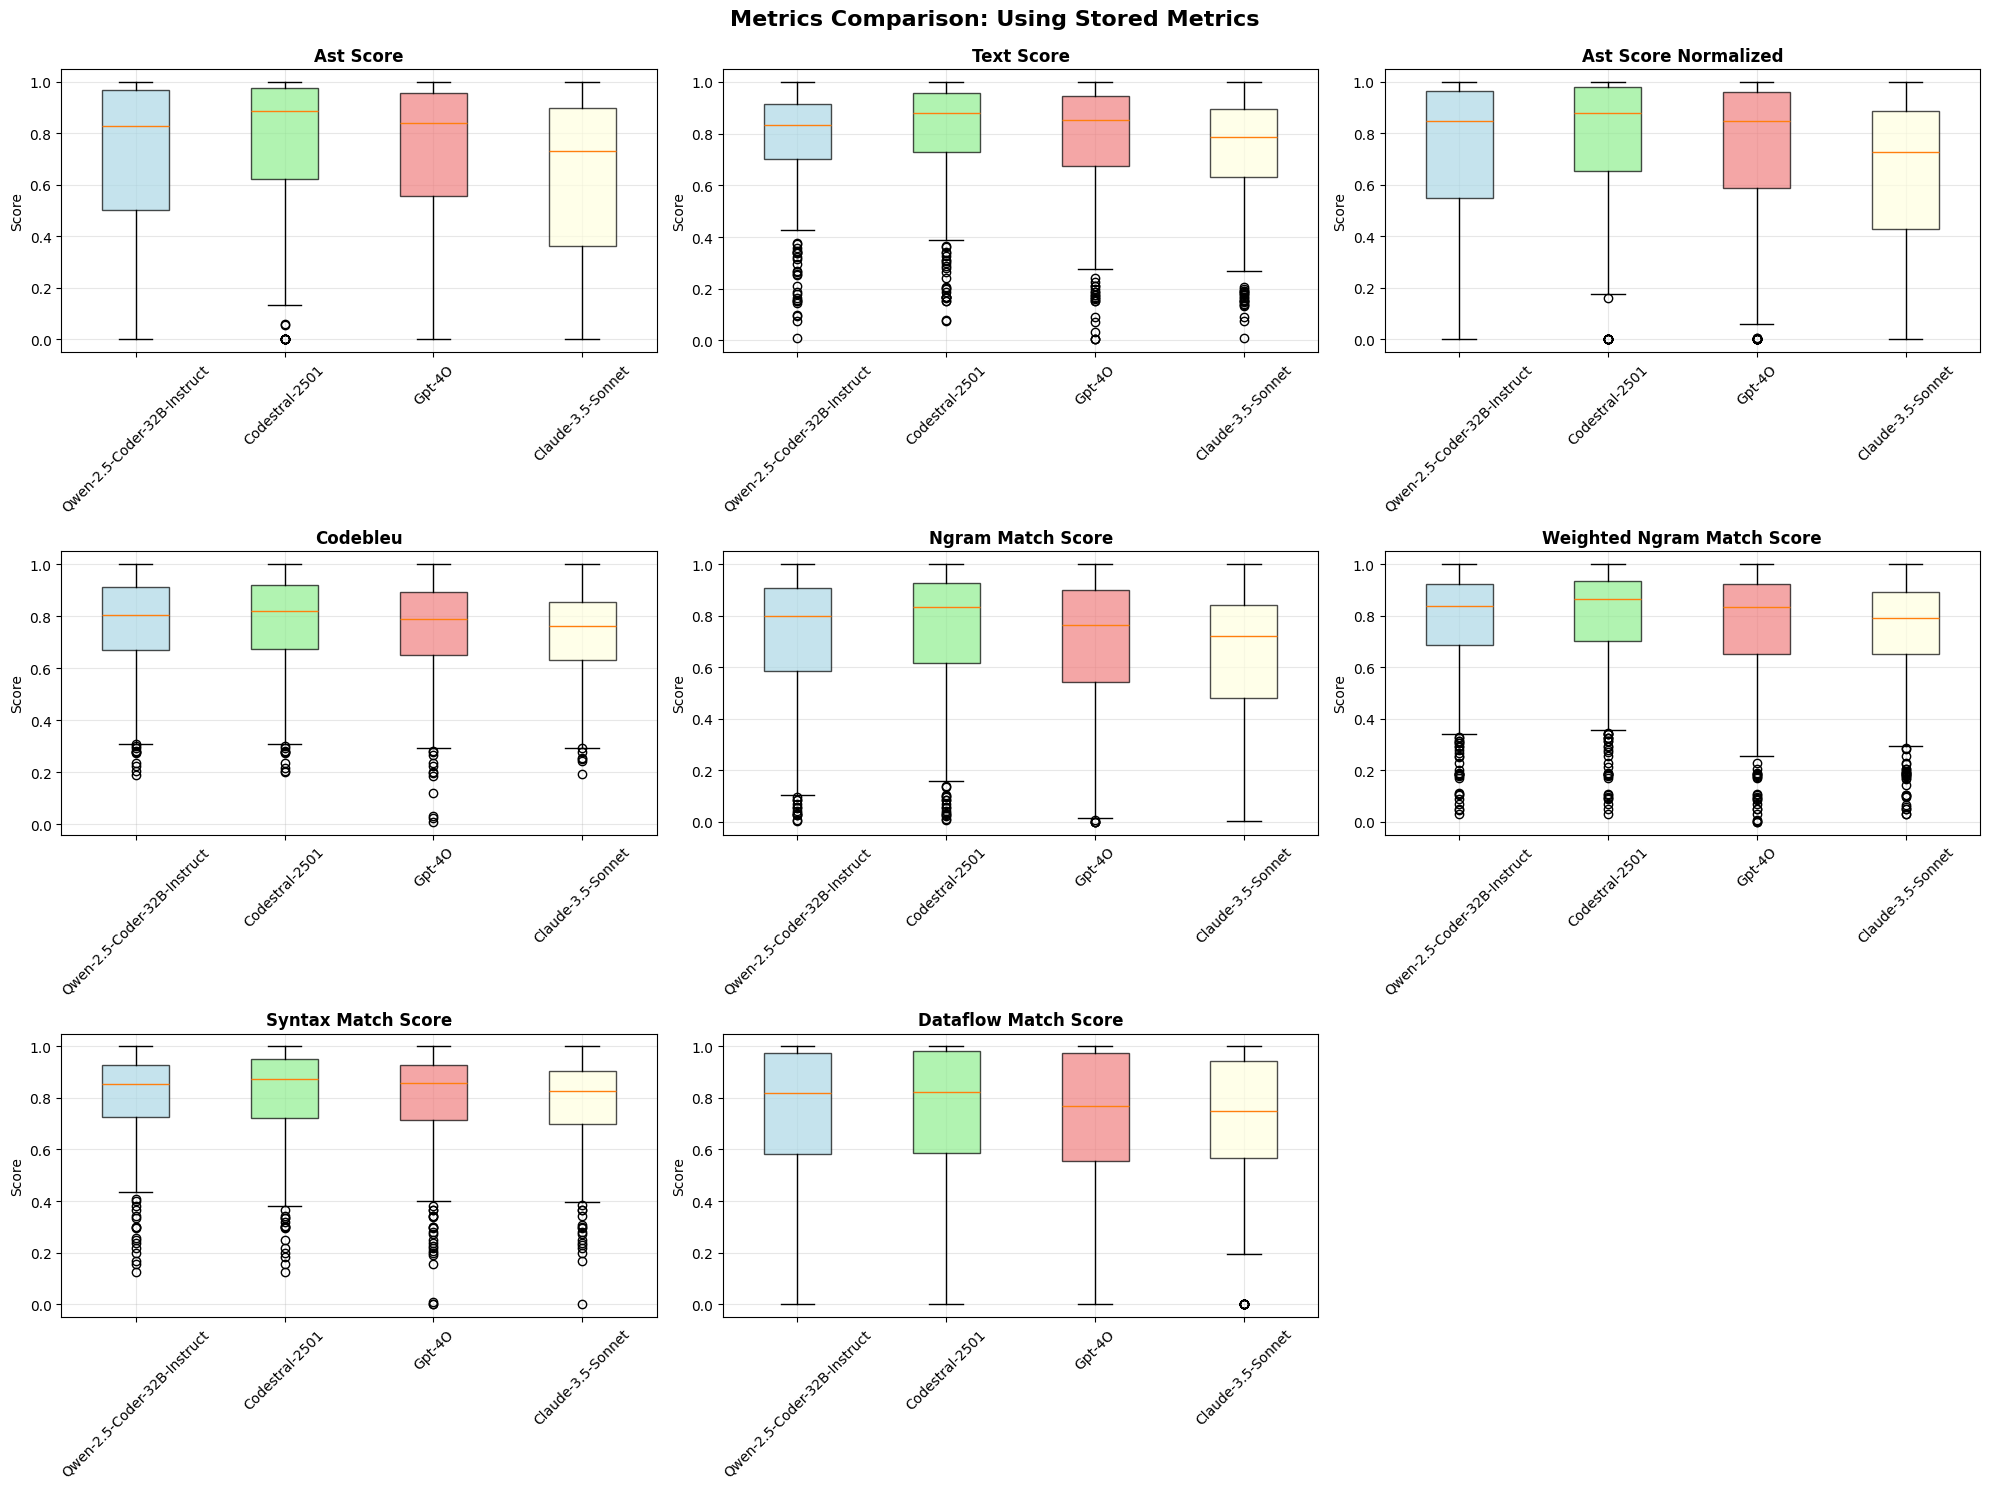


=== SUMMARY STATISTICS (FROM STORED METRICS) ===
Number of response columns: 4
Number of metrics: 8
Available metrics: ['ast_score', 'text_score', 'ast_score_normalized', 'codebleu', 'ngram_match_score', 'weighted_ngram_match_score', 'syntax_match_score', 'dataflow_match_score']

Ast Score:
  Qwen-2.5-Coder-32B-Instruct: mean=0.704, std=0.321, median=0.827 (n=300)
  Codestral-2501: mean=0.759, std=0.284, median=0.888 (n=300)
  Gpt-4O: mean=0.726, std=0.291, median=0.840 (n=300)
  Claude-3.5-Sonnet: mean=0.608, std=0.336, median=0.731 (n=300)

Text Score:
  Qwen-2.5-Coder-32B-Instruct: mean=0.770, std=0.212, median=0.834 (n=300)
  Codestral-2501: mean=0.797, std=0.222, median=0.879 (n=300)
  Gpt-4O: mean=0.767, std=0.243, median=0.851 (n=300)
  Claude-3.5-Sonnet: mean=0.720, std=0.228, median=0.786 (n=300)

Ast Score Normalized:
  Qwen-2.5-Coder-32B-Instruct: mean=0.716, std=0.311, median=0.848 (n=300)
  Codestral-2501: mean=0.770, std=0.274, median=0.881 (n=300)
  Gpt-4O: mean=0.739, 

In [11]:
plot_metrics_boxplots(
    df_prompt, reference_column="after_merge_without_docstrings")

### Syntax Match Score:
prompt = ""You are a helpful assistant that corrects the code based on the traceback error. You must respect the original code structure and the original code style""

No prompt = ""You are a helpful assistant that corrects the code based on the traceback error.""


#### Prompt 
- Qwen-2.5-Coder-32B-Instruct: mean=0.783, std=0.182, median=0.816 (n=100)
- Gpt-4O-Mini: mean=0.784, std=0.186, median=0.840 (n=100)
- Gemini-2.5-Flash: mean=0.775, std=0.193, median=0.821 (n=100)
- Codestral-2501: mean=0.814, std=0.176, median=0.856 (n=100)
#### No prompt
- Qwen-2.5-Coder-32B-Instruct: mean=0.796, std=0.188, median=0.838 (n=100)
- Gpt-4O-Mini: mean=0.741, std=0.229, median=0.804 (n=100)
- Gemini-2.0-Flash-001: mean=0.766, std=0.172, median=0.804 (n=100)
- Gemini-2.5-Flash: mean=0.757, std=0.191, median=0.805 (n=100)
- Codestral-2501: mean=0.804, std=0.190, median=0.854 (n=100)
- Gpt-4.1: mean=0.735, std=0.184, median=0.781 (n=100)

### CodeBleu
#### Prompt
- Qwen-2.5-Coder-32B-Instruct: mean=0.757, std=0.181, median=0.797 (n=100)
- Gpt-4O-Mini: mean=0.744, std=0.181, median=0.782 (n=100)
- Gemini-2.5-Flash: mean=0.728, std=0.198, median=0.768 (n=100)
- Codestral-2501: mean=0.776, std=0.184, median=0.817 (n=100)
#### No prompt
- Qwen-2.5-Coder-32B-Instruct: mean=0.756, std=0.181, median=0.786 (n=100)
- Gpt-4O-Mini: mean=0.703, std=0.225, median=0.761 (n=100)
- Gemini-2.0-Flash-001: mean=0.716, std=0.172, median=0.732 (n=100)
- Gemini-2.5-Flash: mean=0.678, std=0.187, median=0.698 (n=100)
- Codestral-2501: mean=0.771, std=0.187, median=0.822 (n=100)
- Gpt-4.1: mean=0.661, std=0.196, median=0.688 (n=100)

Creating histograms using stored metrics for 1 response columns...


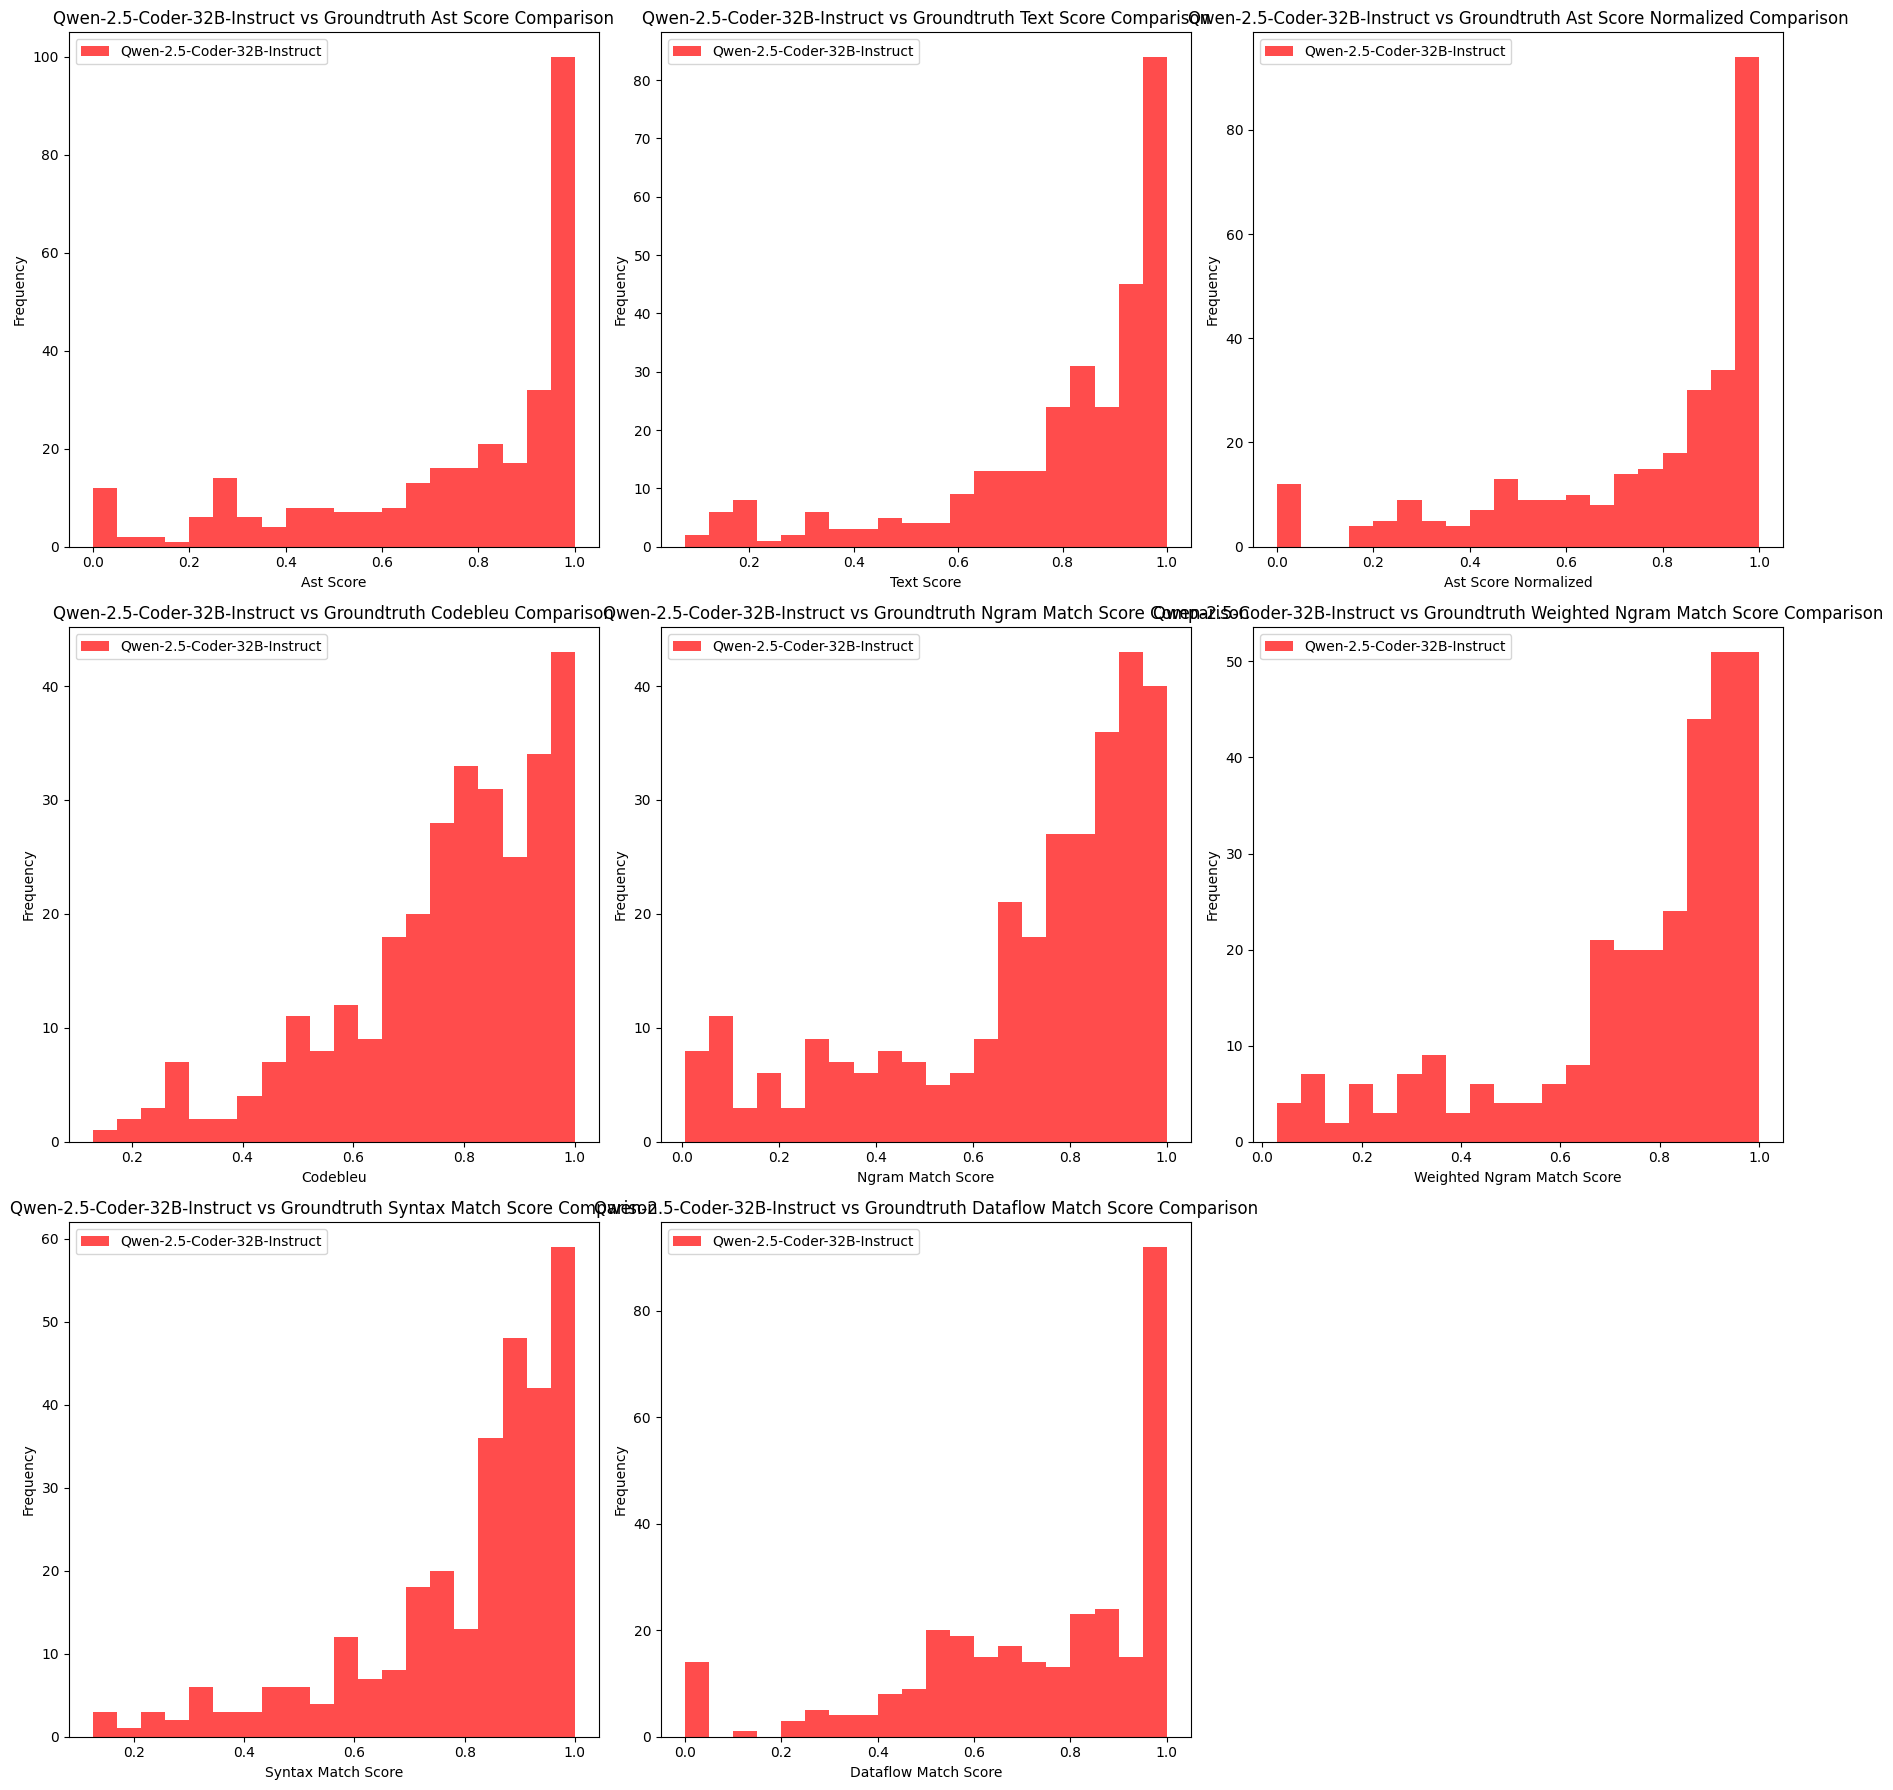

=== Qwen-2.5-Coder-32B-Instruct vs Groundtruth STATISTICS (FROM STORED METRICS) ===
Ast Score - Qwen-2.5-Coder-32B-Instruct: mean=0.741, std=0.285 (n=300)
Text Score - Qwen-2.5-Coder-32B-Instruct: mean=0.792, std=0.224 (n=300)
Ast Score Normalized - Qwen-2.5-Coder-32B-Instruct: mean=0.751, std=0.274 (n=300)
Codebleu - Qwen-2.5-Coder-32B-Instruct: mean=0.763, std=0.191 (n=300)
Ngram Match Score - Qwen-2.5-Coder-32B-Instruct: mean=0.702, std=0.276 (n=300)
Weighted Ngram Match Score - Qwen-2.5-Coder-32B-Instruct: mean=0.751, std=0.247 (n=300)
Syntax Match Score - Qwen-2.5-Coder-32B-Instruct: mean=0.800, std=0.196 (n=300)
Dataflow Match Score - Qwen-2.5-Coder-32B-Instruct: mean=0.734, std=0.267 (n=300)


In [10]:
from utils.visualization import compare_metrics_histograms_from_stored

compare_metrics_histograms_from_stored(
  df=df_base,
  response_columns=['response_qwen-2.5-coder-32b-instruct'],
  title_prefix="Qwen-2.5-Coder-32B-Instruct vs Groundtruth"
)

In [ ]:
compare_groundtruth_vs_corrected_histograms(
    sample_data['after_merge_without_docstrings'], sample_data['response_qwen-2.5-coder-32b-instruct'])

#### qwen

Exact Match - Groundtruth vs Corrected: mean=0.010, std=0.099
Ast Score - Groundtruth vs Corrected: mean=0.201, std=0.346
Text Score - Groundtruth vs Corrected: mean=0.734, std=0.208
Ast Score Normalized - Groundtruth vs Corrected: mean=0.237, std=0.382
Codebleu - Groundtruth vs Corrected: mean=0.733, std=0.197
Ngram Match Score - Groundtruth vs Corrected: mean=0.644, std=0.298
Weighted Ngram Match Score - Groundtruth vs Corrected: mean=0.706, std=0.258
Syntax Match Score - Groundtruth vs Corrected: mean=0.783, std=0.189
Dataflow Match Score - Groundtruth vs Corrected: mean=0.739, std=0.257

#### gpt

Exact Match - Groundtruth vs Corrected: mean=0.000, std=0.000
Ast Score - Groundtruth vs Corrected: mean=0.200, std=0.347
Text Score - Groundtruth vs Corrected: mean=0.652, std=0.274
Ast Score Normalized - Groundtruth vs Corrected: mean=0.253, std=0.390
Codebleu - Groundtruth vs Corrected: mean=0.662, std=0.226
Ngram Match Score - Groundtruth vs Corrected: mean=0.547, std=0.322
Weighted Ngram Match Score - Groundtruth vs Corrected: mean=0.623, std=0.308
Syntax Match Score - Groundtruth vs Corrected: mean=0.740, std=0.230
Dataflow Match Score - Groundtruth vs Corrected: mean=0.660, std=0.290

Boxplot pra cada modelo vs gt lado a lado
adicionar modelos de tamanho similares.

sera que se eu pedir (mudança de prompt) para ele fixar o estilo ele perde a corretude no bug

add mais 2 modelos (pequeno e medio)


In [ ]:
compare_groundtruth_vs_corrected_histograms(
    sample_data['after_merge_without_docstrings'], sample_data['response_gpt-4o-mini'])

In [ ]:
compare_groundtruth_vs_corrected_histograms(sample_data[sample_data['traceback_type'] == 'AttributeError']
                                            ['after_merge'], sample_data[sample_data['traceback_type'] == 'AttributeError']['response_gpt-4o-mini'])

In [ ]:
compare_groundtruth_vs_corrected_histograms(sample_data[sample_data['traceback_type'] == 'ValueError']
                                            ['after_merge'], sample_data[sample_data['traceback_type'] == 'ValueError']['response_gpt-4o-mini'])

In [ ]:
# Call the function with the lists
compare_metrics_versus_bug_histograms(
    sample_data['before_merge'], sample_data['after_merge'], sample_data['response_qwen-2.5-coder-32b-instruct'])

In [ ]:
from utils.simple_metrics import codebleu
codebleu_scores = codebleu(
    sample_data['before_merge'].iloc[0], sample_data['after_merge'].iloc[0])
print(codebleu_scores)

In [ ]:
codebleu_scores = codebleu(sample_data['before_merge_without_docstrings'].iloc[0],
                           sample_data['after_merge_without_docstrings'].iloc[0])
print(codebleu_scores)

In [ ]:
print(sample_data['response_gpt-4o-mini'].iloc[0])

In [21]:
import re
import itertools
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon
from typing import Optional, Literal

def wilcoxon_metric_test(
    df_a: pd.DataFrame,
    model_a: str,
    metric: str,
    df_b: Optional[pd.DataFrame] = None,
    model_b: Optional[str] = None,
    pair_on: str = "sample_uuid",
    alternative: Literal["two-sided", "greater", "less"] = "two-sided",
    zero_method: Literal["wilcox", "pratt", "zsplit"] = "wilcox",
    *,
    n_boot: int = 5000,
    alpha: float = 0.01,
    seed: Optional[int] = 0,
) -> pd.Series:
    """
    Wilcoxon pareado para métricas por `sample_uuid`, com IC bootstrap do diff_median
    e contagens de wins/ties/losses.

    Formato das colunas esperadas: f"metric_{model}_{metric}"

    Exemplos
    --------
    # (1) Mesmo dataset, modelos diferentes
    # wilcoxon_metric_test(baseline, "gpt-4o", "codebleu", model_b="claude-3.5-sonnet", alternative="greater")

    # (2) Datasets diferentes, mesmo modelo
    # wilcoxon_metric_test(baseline, "gpt-4o", "codebleu", df_b=sys_apr, model_b="gpt-4o", alternative="two-sided")

    Parâmetros relevantes
    ---------------------
    alternative : "greater" testa se model_a > model_b.
    zero_method : "wilcox" descarta empates; "pratt" incorpora.
    n_boot, alpha, seed : controle do bootstrap do diff_median.
    """
    if model_b is None:
        raise ValueError("You must provide model_b for comparison.")

    col_a = f"metric_{model_a}_{metric}"
    col_b = f"metric_{model_b}_{metric}"

    def _validate(df, col):
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in provided DataFrame.")

    _validate(df_a, col_a)
    if df_b is None:
        df_b = df_a
    _validate(df_b, col_b)

    # Seleção, alinhamento e limpeza
    a = df_a[[pair_on, col_a]].rename(columns={col_a: "a"})
    b = df_b[[pair_on, col_b]].rename(columns={col_b: "b"})
    m = (
        a.merge(b, on=pair_on, how="inner")
         .replace([np.inf, -np.inf], np.nan)
         .dropna(subset=["a", "b"])
    )
    if m.empty:
        raise ValueError("No paired, non-null observations after alignment on sample_uuid.")

    x = m["a"].to_numpy()
    y = m["b"].to_numpy()
    diffs = x - y

    # Contagens de wins/ties/losses (após limpeza, antes do zero_method)
    wins = int(np.sum(diffs > 0))
    losses = int(np.sum(diffs < 0))
    ties = int(np.sum(diffs == 0))
    n_paired = int(len(diffs))
    n_nonzero = wins + losses
    if n_nonzero == 0:
        raise ValueError("All paired differences are zero after alignment; Wilcoxon is undefined.")

    # Teste de Wilcoxon (pareado)
    stat, pval = wilcoxon(x, y, alternative=alternative, zero_method=zero_method)

    # Efeitos/métricas-resumo
    median_a = float(np.median(x))
    median_b = float(np.median(y))
    mean_a = float(np.mean(x))
    mean_b = float(np.mean(y))
    diff_med = float(np.median(diffs))
    diff_mean = float(np.mean(diffs))
    cl = float(wins / n_nonzero)  # Common Language: P(a > b | não-empate)

    # IC bootstrap para diff_median (Hodges–Lehmann no caso pareado)
    if n_boot and n_boot > 0:
        rng = np.random.default_rng(seed)
        idx = rng.integers(0, n_paired, size=(n_boot, n_paired))
        boot_medians = np.median(diffs[idx], axis=1)
        ci_low, ci_high = np.quantile(boot_medians, [alpha/2, 1 - alpha/2])
        ci_low = float(ci_low)
        ci_high = float(ci_high)
    else:
        ci_low = float("nan")
        ci_high = float("nan")

    # Saída consolidada
    res = pd.Series({
        "model_a": model_a,
        "model_b": model_b,
        "metric": metric,
        "col_a": col_a,
        "col_b": col_b,
        "n_paired": n_paired,
        "wins": wins,
        "ties": ties,
        "losses": losses,
        "wins_pct": wins / n_paired,
        "ties_pct": ties / n_paired,
        "losses_pct": losses / n_paired,
        "n_nonzero": n_nonzero,
        "statistic": float(stat),
        "pvalue": float(pval),
        "alternative": alternative,
        "median_a": median_a,
        "median_b": median_b,
        "mean_a": mean_a,
        "mean_b": mean_b,
        "diff_median": diff_med,
        "diff_median_ci_low": ci_low,
        "diff_median_ci_high": ci_high,
        "diff_mean": diff_mean,
        "cl_effect": cl,               # ~0.5 neutro; >0.5 favorece model_a
        "n_boot": int(n_boot),
        "alpha": float(alpha),
        "seed": seed if seed is not None else np.nan,
        "zero_method": zero_method,
    })
    return res

# ---------- 1) Identificação de experimento + Tidy ----------
def _infer_experiment(df: pd.DataFrame, fallback: str) -> str:
    """
    Usa df['prompt'] para identificar o experimento, senão cai no fallback fornecido.
    Esperado: 'baseline', 'system_apr', 'style_based'.
    """
    if "prompt" in df.columns:
        vals = pd.unique(df["prompt"].astype(str))
        if len(vals) == 1:
            return vals[0]
    return fallback
def parse_metric_col(col: str) -> tuple[str, str]:
    if not col.startswith("metric_"):
        raise ValueError(f"Coluna não é de métrica: {col}")
    inner = col[len("metric_"):]              # ex: "gpt-4o_ast_score"
    model, metric = inner.split("_", 1)       # -> "gpt-4o", "ast_score"
    # Sanidade: modelos não devem conter "_"
    if "_" in model:
        raise ValueError(f"Parsing incorreto: model='{model}' contém '_' para coluna {col}")
    return model, metric

def tidy_metrics(df: pd.DataFrame, dataset_label: str, id_cols=("sample_uuid",)) -> pd.DataFrame:
    experiment = _infer_experiment(df, dataset_label)
    metric_cols = [c for c in df.columns if c.startswith("metric_")]

    long = []
    base = df[list(id_cols)].copy()
    base["experiment"] = experiment

    for c in metric_cols:
        model, metric = parse_metric_col(c)
        tmp = base.copy()
        tmp["model"] = model
        tmp["metric"] = metric
        tmp["value"] = df[c].values
        long.append(tmp)

    return pd.concat(long, ignore_index=True)

def _parse_metric_columns(df: pd.DataFrame):
    cols = [c for c in df.columns if c.startswith("metric_")]
    parsed = []
    for c in cols:
        model, metric = parse_metric_col(c)
        parsed.append((c, model, metric))
    return parsed

def available_models(df: pd.DataFrame) -> set:
    return {m for _, m, _ in _parse_metric_columns(df)}

def metrics_for_model(df: pd.DataFrame, model: str) -> set:
    return {metric for _, m, metric in _parse_metric_columns(df) if m == model}

# ---------- 3) Ajuste de p-values (Holm) por família ----------
def _holm_adjust(pvals: np.ndarray) -> np.ndarray:
    """
    Holm-Bonferroni, retorna p-ajustados no mesmo ordenamento de entrada.
    """
    m = len(pvals)
    order = np.argsort(pvals)
    adj = np.empty_like(pvals, dtype=float)
    prev = 0.0
    for k, idx in enumerate(order):
        rank = k + 1  # 1..m na ordem crescente
        val = (m - k) * pvals[idx]
        val = min(1.0, val)
        prev = max(prev, val)
        adj[idx] = prev
    return adj

def adjust_pvalues_by_family(df: pd.DataFrame, group_cols=("scope", "metric")) -> pd.DataFrame:
    out = df.copy()
    out["p_adj"] = np.nan
    out["reject_01"] = False
    for _, gidx in out.groupby(list(group_cols)).groups.items():
        idx = list(gidx)
        padj = _holm_adjust(out.loc[idx, "pvalue"].to_numpy())
        out.loc[idx, "p_adj"] = padj
        out.loc[idx, "reject_01"] = padj <= 0.01
    return out

# ---------- 4) Runner para TODAS as combinações ----------
def run_all_wilcoxon(
    datasets: dict,  # ex: {"baseline": baseline, "system_apr": sys_apr, "style_based": style}
    *,
    alternative_within: str = "two-sided",
    alternative_across: str = "two-sided",
    zero_method: str = "wilcox",
    n_boot: int = 5000,
    alpha: float = 0.01,
    seed: int = 0,
) -> pd.DataFrame:
    """
    Roda:
      (A) Dentro de cada dataset: TODOS pares de modelos para TODAS as métricas em comum.
      (B) Entre datasets: para cada par de datasets, mesmo modelo e métricas em comum.

    Retorna DataFrame consolidado com p-ajustado (Holm) por família (scope, metric).
    """
    rows = []

    # (A) Dentro do mesmo dataset
    for dname, df in datasets.items():
        mods = sorted(list(available_models(df)))
        for model_a, model_b in itertools.combinations(mods, 2):
            mets = sorted(list(metrics_for_model(df, model_a).intersection(metrics_for_model(df, model_b))))
            for metric in mets:
                res = wilcoxon_metric_test(
                    df, model_a, metric,
                    model_b=model_b,
                    alternative=alternative_within,
                    zero_method=zero_method,
                    n_boot=n_boot, alpha=alpha, seed=seed
                )
                r = res.to_dict()
                r["scope"] = "within_dataset_models"
                r["dataset"] = dname
                r["dataset_a"] = dname
                r["dataset_b"] = dname
                rows.append(r)

    # (B) Entre datasets (mesmo modelo)
    dnames = list(datasets.keys())
    for dA, dB in itertools.combinations(dnames, 2):
        dfA, dfB = datasets[dA], datasets[dB]
        common_models = sorted(list(available_models(dfA).intersection(available_models(dfB))))
        for model in common_models:
            mets = sorted(list(metrics_for_model(dfA, model).intersection(metrics_for_model(dfB, model))))
            for metric in mets:
                res = wilcoxon_metric_test(
                    dfA, model, metric,
                    df_b=dfB, model_b=model,
                    alternative=alternative_across,
                    zero_method=zero_method,
                    n_boot=n_boot, alpha=alpha, seed=seed
                )
                r = res.to_dict()
                r["scope"] = "across_datasets_model"
                r["dataset"] = None
                r["dataset_a"] = dA
                r["dataset_b"] = dB
                rows.append(r)

    out = pd.DataFrame(rows)

    # Ajuste Holm por família (scope, metric)
    if not out.empty:
        out = adjust_pvalues_by_family(out, group_cols=("scope", "metric"))
    return out

# ---------- 5) (Opcional) construir o tidy global para inspeção/plots ----------
def build_global_tidy(datasets: dict) -> pd.DataFrame:
    tlist = [tidy_metrics(df, name) for name, df in datasets.items()]
    return pd.concat(tlist, ignore_index=True)


In [22]:
# 0) Monte o registry
datasets = {
    "baseline": df_base,
    "system": df_sys,
    "prompt_style": df_prompt,
}

# Garantir que 'sample_uuid' está como coluna em todos os datasets
for name, df in datasets.items():
    # Se 'sample_uuid' não está nem nas colunas nem como index, erro
    if 'sample_uuid' not in df.columns and (df.index.name != 'sample_uuid'):
        raise ValueError(f"'sample_uuid' column missing in dataset '{name}'")
    # Se 'sample_uuid' está como index mas não como coluna, resetar o index para garantir coluna
    if df.index.name == 'sample_uuid' and 'sample_uuid' not in df.columns:
        datasets[name] = df.reset_index()
    # Se 'sample_uuid' está como coluna mas não como index, ok
    # Se 'sample_uuid' está como index e como coluna, ok
    # Se 'sample_uuid' está como coluna e index não é 'sample_uuid', ok

# 1) Rodar tudo (bicaudal por padrão; mude se já tiver direções pré-especificadas)
results = run_all_wilcoxon(
    datasets,
    alternative_within="two-sided",
    alternative_across="two-sided",
    zero_method="pratt",     # se houver muitos empates
    n_boot=5000, alpha=0.05, seed=0
)

# 2) Ver os top achados por métrica
results.sort_values(["metric", "p_adj"]).head(20)

# 3) (Opcional) Tidy para análise/plots
tidy = build_global_tidy(datasets)

In [23]:
print(results[(results['metric'] == 'codebleu') | (results['metric'] == 'ast_score_normalized')].to_string(index=False))

                    model_a                     model_b               metric                                                   col_a                                                   col_b  n_paired  wins  ties  losses  wins_pct  ties_pct  losses_pct  n_nonzero  statistic       pvalue alternative  median_a  median_b   mean_a   mean_b  diff_median  diff_median_ci_low  diff_median_ci_high  diff_mean  cl_effect  n_boot  alpha  seed zero_method                 scope      dataset    dataset_a    dataset_b        p_adj  reject_01
          claude-3.5-sonnet              codestral-2501 ast_score_normalized           metric_claude-3.5-sonnet_ast_score_normalized              metric_codestral-2501_ast_score_normalized       300    48    40     212  0.160000  0.133333    0.706667        260     7297.0 4.187441e-23   two-sided  0.724036  0.878548 0.614732 0.770226    -0.036164           -0.056046            -0.019254  -0.155494   0.184615    5000   0.05     0       pratt within_dataset_models    

In [24]:
print(
    results[
        (
            (results['scope'] == 'within_dataset_models') &
            (
                (results['metric'] == 'codebleu') | 
                (results['metric'] == 'ast_score_normalized')
            ) & 
            (results['pvalue'] < 0.01)
        )
    ].to_string(index=False)
)

          model_a                     model_b               metric                                         col_a                                                   col_b  n_paired  wins  ties  losses  wins_pct  ties_pct  losses_pct  n_nonzero  statistic       pvalue alternative  median_a  median_b   mean_a   mean_b  diff_median  diff_median_ci_low  diff_median_ci_high  diff_mean  cl_effect  n_boot  alpha  seed zero_method                 scope      dataset    dataset_a    dataset_b        p_adj  reject_01
claude-3.5-sonnet              codestral-2501 ast_score_normalized metric_claude-3.5-sonnet_ast_score_normalized              metric_codestral-2501_ast_score_normalized       300    48    40     212  0.160000  0.133333    0.706667        260     7297.0 4.187441e-23   two-sided  0.724036  0.878548 0.614732 0.770226    -0.036164           -0.056046            -0.019254  -0.155494   0.184615    5000   0.05     0       pratt within_dataset_models     baseline     baseline     baseline 7.11